<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Final-Feature-Engineering" data-toc-modified-id="1.-Final-Feature-Engineering-1">1. Final Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-1.1">Feature Scaling</a></span></li></ul></li><li><span><a href="#2.-Random-Forest-Model(With-Outliers)" data-toc-modified-id="2.-Random-Forest-Model(With-Outliers)-2">2. Random Forest Model(With Outliers)</a></span><ul class="toc-item"><li><span><a href="#2.1-Without-SMOTE" data-toc-modified-id="2.1-Without-SMOTE-2.1">2.1 Without SMOTE</a></span></li><li><span><a href="#2.2-With-SMOTE" data-toc-modified-id="2.2-With-SMOTE-2.2">2.2 With SMOTE</a></span></li></ul></li><li><span><a href="#3.-Random-Forest-Model(Without-Outliers)" data-toc-modified-id="3.-Random-Forest-Model(Without-Outliers)-3">3. Random Forest Model(Without Outliers)</a></span><ul class="toc-item"><li><span><a href="#3.1-Without-SMOTE" data-toc-modified-id="3.1-Without-SMOTE-3.1">3.1 Without SMOTE</a></span></li><li><span><a href="#3.2-With-SMOTE" data-toc-modified-id="3.2-With-SMOTE-3.2">3.2 With SMOTE</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [2]:
# df_train = pd.read_pickle('../Data/part2_df_train_outliers.pkl')
# df_test = pd.read_pickle('../Data/part2_df_test_outliers.pkl')

df_train = pd.read_pickle('../Data/part2_df_train_NO_outliers.pkl')
df_test = pd.read_pickle('../Data/part2_df_test_NO_outliers.pkl')

## 1. Final Feature Engineering

In [3]:
X_train = df_train.drop(['loan_status'], axis=1)
y_train = df_train.loc[:, 'loan_status']

X_test = df_test.drop(['loan_status'], axis=1)
y_test = df_test['loan_status']

### Feature Scaling

As features are measured in different units, they cover different ranges. Some ML models, such as SVM, KNN that take into account distance measures between observations are therefore significantly affected by the range of the features and scaling allows them to learn. While some methods, such as Linear Regression and Ransom Forest do not actually require feature scaling, it's still best practice to take this step when we are comparing multiple algorithms.

Removing mean and dividing the standard deviation of features respectively.

In [4]:
# Create an imputer object with a median filling strategy
scaler = StandardScaler()

# Train on the training features
scaler.fit(X_train)

# Transform both training and testing data
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## 2. Random Forest Model(With Outliers)

### 2.1 Without SMOTE

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_pred = rf.predict(X_test)
print('Accuracy {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy 0.84


In [7]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[46169  1064]
 [ 7999   829]]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     47233
         1.0       0.44      0.09      0.15      8828

    accuracy                           0.84     56061
   macro avg       0.65      0.54      0.53     56061
weighted avg       0.79      0.84      0.79     56061



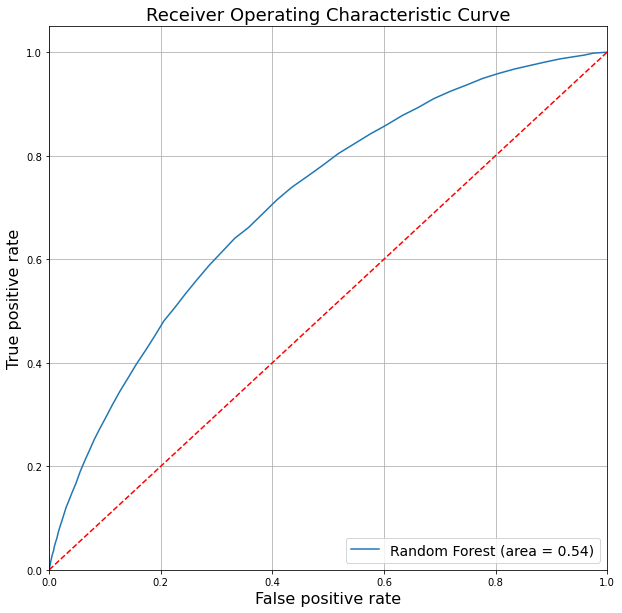

In [9]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('Receiver Operating Characteristic Curve',fontsize=18)
plt.legend(loc="lower right", fontsize = 14)
plt.grid(visible=bool)
plt.savefig('../Figures/RF_outliers_no_smote')
plt.show()

### 2.2 With SMOTE

In [5]:
sm = SMOTE(random_state=12, n_jobs = -1, k_neighbors=5, sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X_train, y_train)

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
y_pred = rf.predict(X_test)
print('Accuracy {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy 0.82


In [8]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[44091  3142]
 [ 7151  1677]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90     47233
         1.0       0.35      0.19      0.25      8828

    accuracy                           0.82     56061
   macro avg       0.60      0.56      0.57     56061
weighted avg       0.78      0.82      0.79     56061



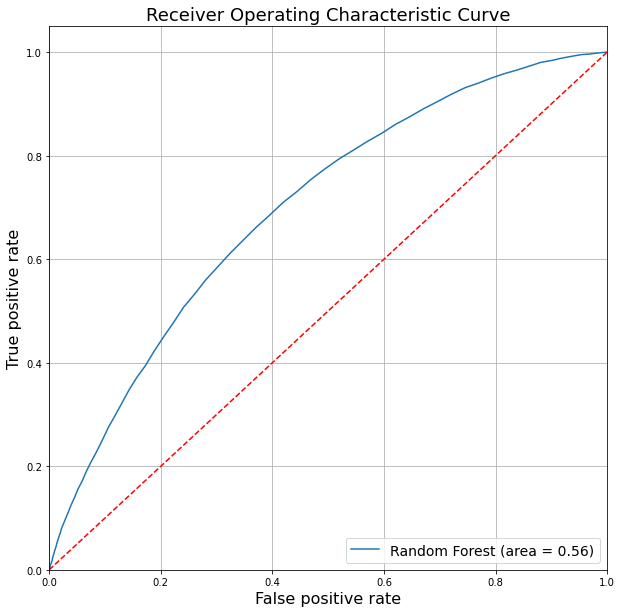

In [10]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('Receiver Operating Characteristic Curve',fontsize=18)
plt.legend(loc="lower right", fontsize = 14)
plt.grid(visible=bool)
plt.savefig('../Figures/RF_outliers_smote')
plt.show()

## 3. Random Forest Model(Without Outliers)

### 3.1 Without SMOTE

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_pred = rf.predict(X_test)
print('Accuracy {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy 0.84


In [7]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[38501   615]
 [ 6694   484]]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     39116
         1.0       0.44      0.07      0.12      7178

    accuracy                           0.84     46294
   macro avg       0.65      0.53      0.52     46294
weighted avg       0.79      0.84      0.79     46294



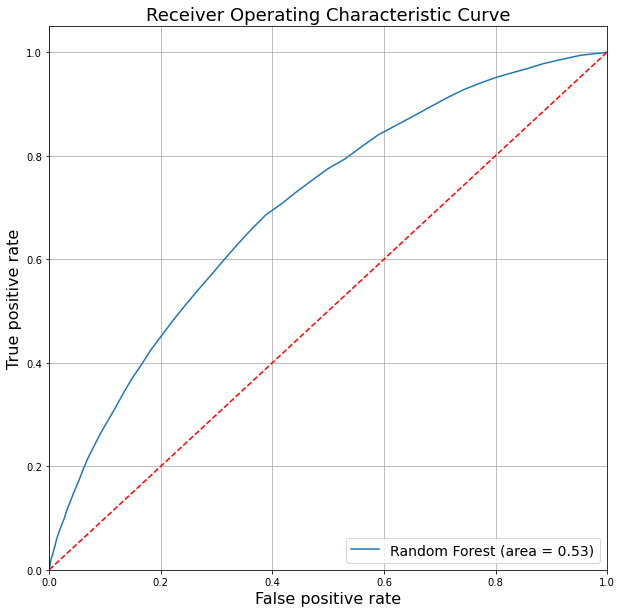

In [9]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('Receiver Operating Characteristic Curve',fontsize=18)
plt.legend(loc="lower right", fontsize = 14)
plt.grid(visible=bool)
plt.savefig('../Figures/RF_no_outliers_no_smote')
plt.show()

### 3.2 With SMOTE

In [5]:
sm = SMOTE(random_state=12, n_jobs = -1, k_neighbors=5, sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X_train, y_train)

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
y_pred = rf.predict(X_test)
print('Accuracy {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy 0.82


In [8]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[36804  2312]
 [ 6023  1155]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     39116
         1.0       0.33      0.16      0.22      7178

    accuracy                           0.82     46294
   macro avg       0.60      0.55      0.56     46294
weighted avg       0.78      0.82      0.79     46294



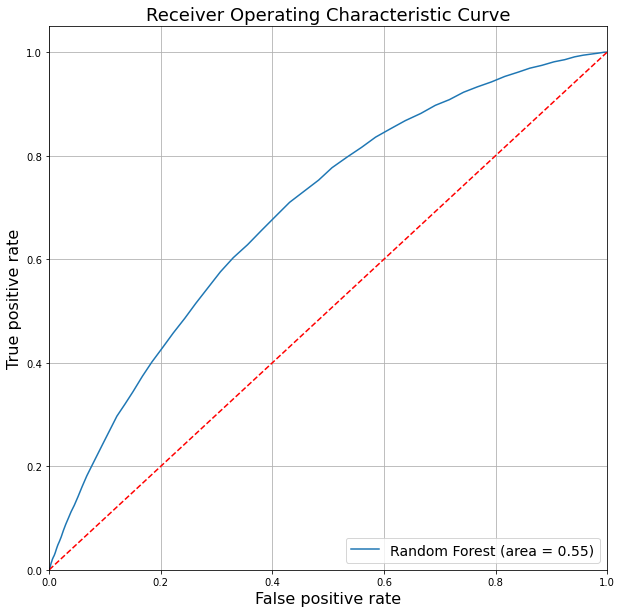

In [11]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('Receiver Operating Characteristic Curve',fontsize=18)
plt.legend(loc="lower right", fontsize = 14)
plt.grid(visible=bool)
plt.savefig('../Figures/RF_no_outliers_smote')
plt.show()